In [2]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#IMPORT DATASET
emissions = pd.read_csv("co2_emissions (1) (1).csv")
emissions

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


# EDA

In [4]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

There is no missing data in data set. There are categorical values present in dataset.

In [5]:
emissions.describe(exclude='number')

,make,model,vehicle_class,transmission,fuel_type
count,7385,7385,7385,7385,7385
unique,42,2053,16,5,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS,X
freq,628,32,1217,3127,3637


We can say that SUV-SMALL, AS (Automatic with select shift), X (Regular gasoline) cars are present more in the given data set.

In [6]:
emissions.isna().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

No null values are present in dataset.

In [7]:
emissions.head(10)#Top ten rows in dataset

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS,Z,10.6,7.5,9.2,31,212


In [8]:
emissions.describe()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


Mean and Median are almost equal in most of the variables, which means that the data exhibits normal distribution.

# DATA CLEANING

In [9]:
#Checking for duplicates.
emissions[emissions.duplicated()]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M,X,7.9,5.9,7.0,40,163


In [10]:
#Dropping duplicate rows
emissions1= emissions.drop_duplicates().reset_index(drop=True)
emissions1

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
6268,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
6269,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
6270,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
6271,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


In [11]:
emissions1.shape

(6273, 12)

In [12]:
emissions.shape

(7385, 12)

Dropping fuel_consumption_comb(mpg) column as there is only measurement units difference between the two fuel consumption combination columns

In [13]:
emissions1.drop(['fuel_consumption_comb(mpg)'],axis=1, inplace=True)

In [14]:
emissions1.head(5)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,244


# DATA VISUALIZATION

<Axes: xlabel='count', ylabel='vehicle_class'>

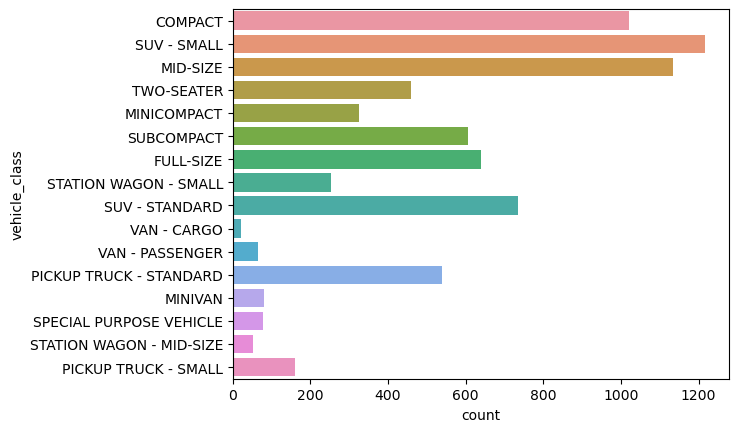

In [16]:
sns.countplot(data=emissions,y=emissions['vehicle_class'])

SUV-SMALL vehicle class is present more in data

<Axes: xlabel='count', ylabel='cylinders'>

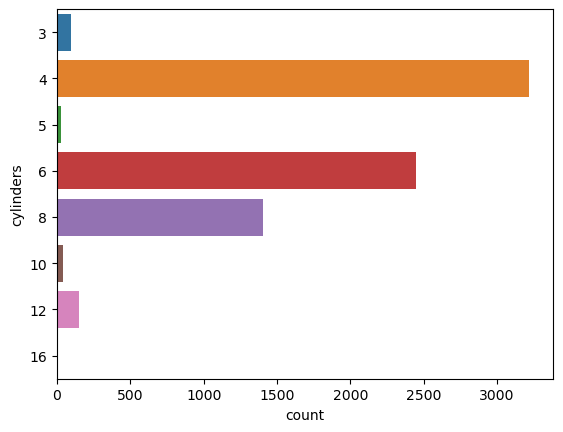

In [17]:
sns.countplot(data=emissions,y=emissions['cylinders'])

<Axes: xlabel='count', ylabel='transmission'>

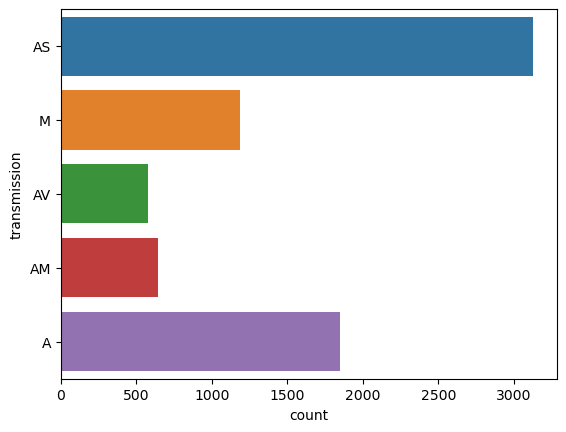

In [18]:
sns.countplot(data=emissions,y=emissions['transmission'])

<Axes: xlabel='count', ylabel='fuel_type'>

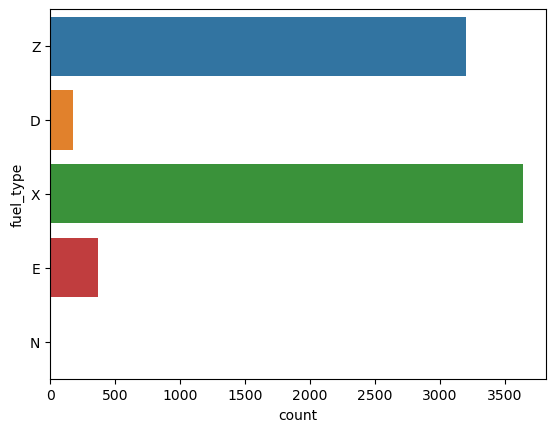

In [19]:
sns.countplot(data=emissions,y=emissions['fuel_type'])

<Axes: xlabel='transmission', ylabel='co2_emissions'>

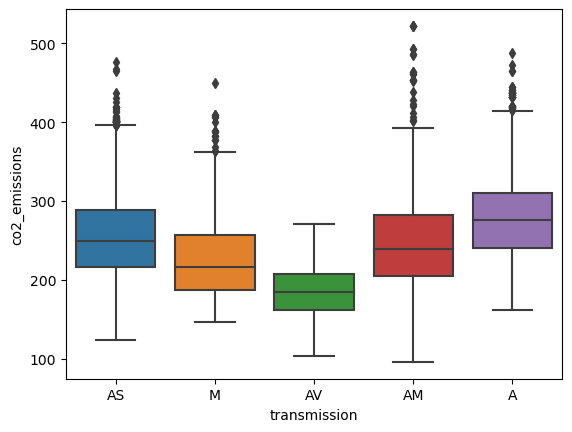

In [20]:
sns.boxplot(data=emissions, x='transmission', y='co2_emissions')


AV transmission vehicles are emitting less co2 levels than remaining trasmissions.

<Axes: xlabel='cylinders', ylabel='co2_emissions'>

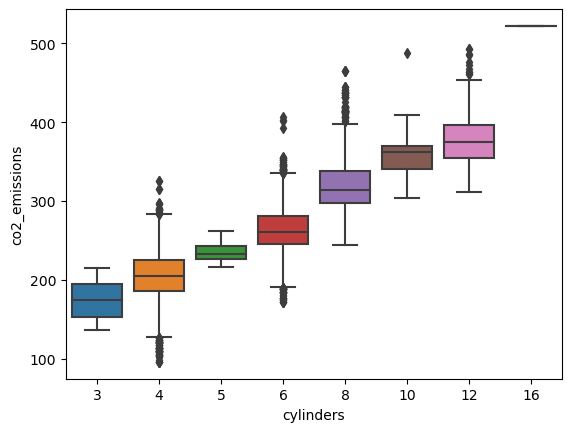

In [21]:
sns.boxplot(data=emissions, x='cylinders', y='co2_emissions')

Number of cylinders and CO2 emissions are positively correlated. As number of cylinders are increasing, co2 emissions are also increasing.

<Axes: xlabel='engine_size', ylabel='co2_emissions'>

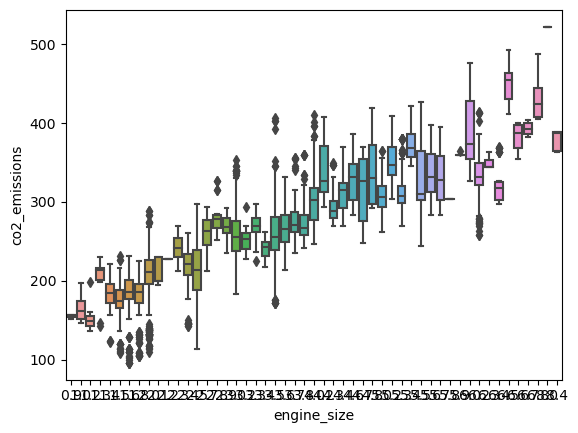

In [22]:
sns.boxplot(data=emissions, x='engine_size', y='co2_emissions')

Engine size and CO2 emissions are positively correlated. As engine size is increasing, co2 emissions are also increasing.

<Axes: xlabel='fuel_type', ylabel='co2_emissions'>

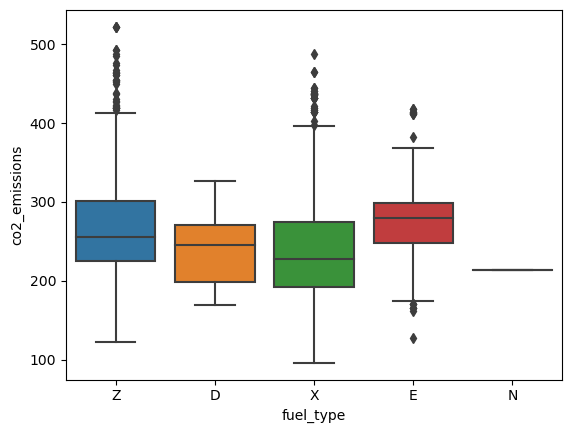

In [23]:
sns.boxplot(data=emissions, x='fuel_type', y='co2_emissions')

Fuel Consumption comparision between Highway and City

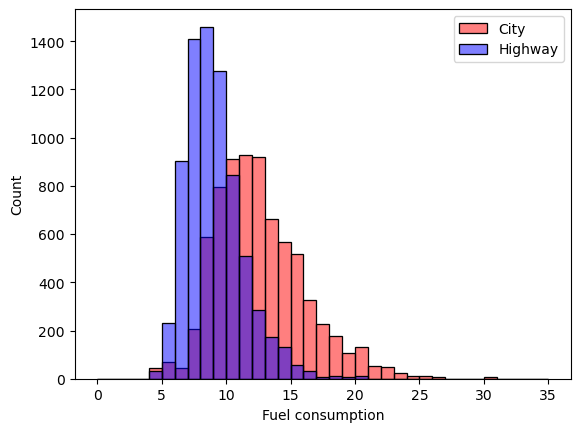

In [24]:
fig, ax = plt.subplots()
sns.histplot(data=emissions, x='fuel_consumption_city', binrange=(0,35), binwidth=1, ax=ax, 
             color='red', alpha=0.5, label='City')
sns.histplot(data=emissions, x='fuel_consumption_hwy', binrange=(0,35), binwidth=1, ax=ax, 
             color='blue', alpha=0.5, label='Highway')
ax.set_xlabel('Fuel consumption')
ax.legend()

/Users/snehakoneru/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


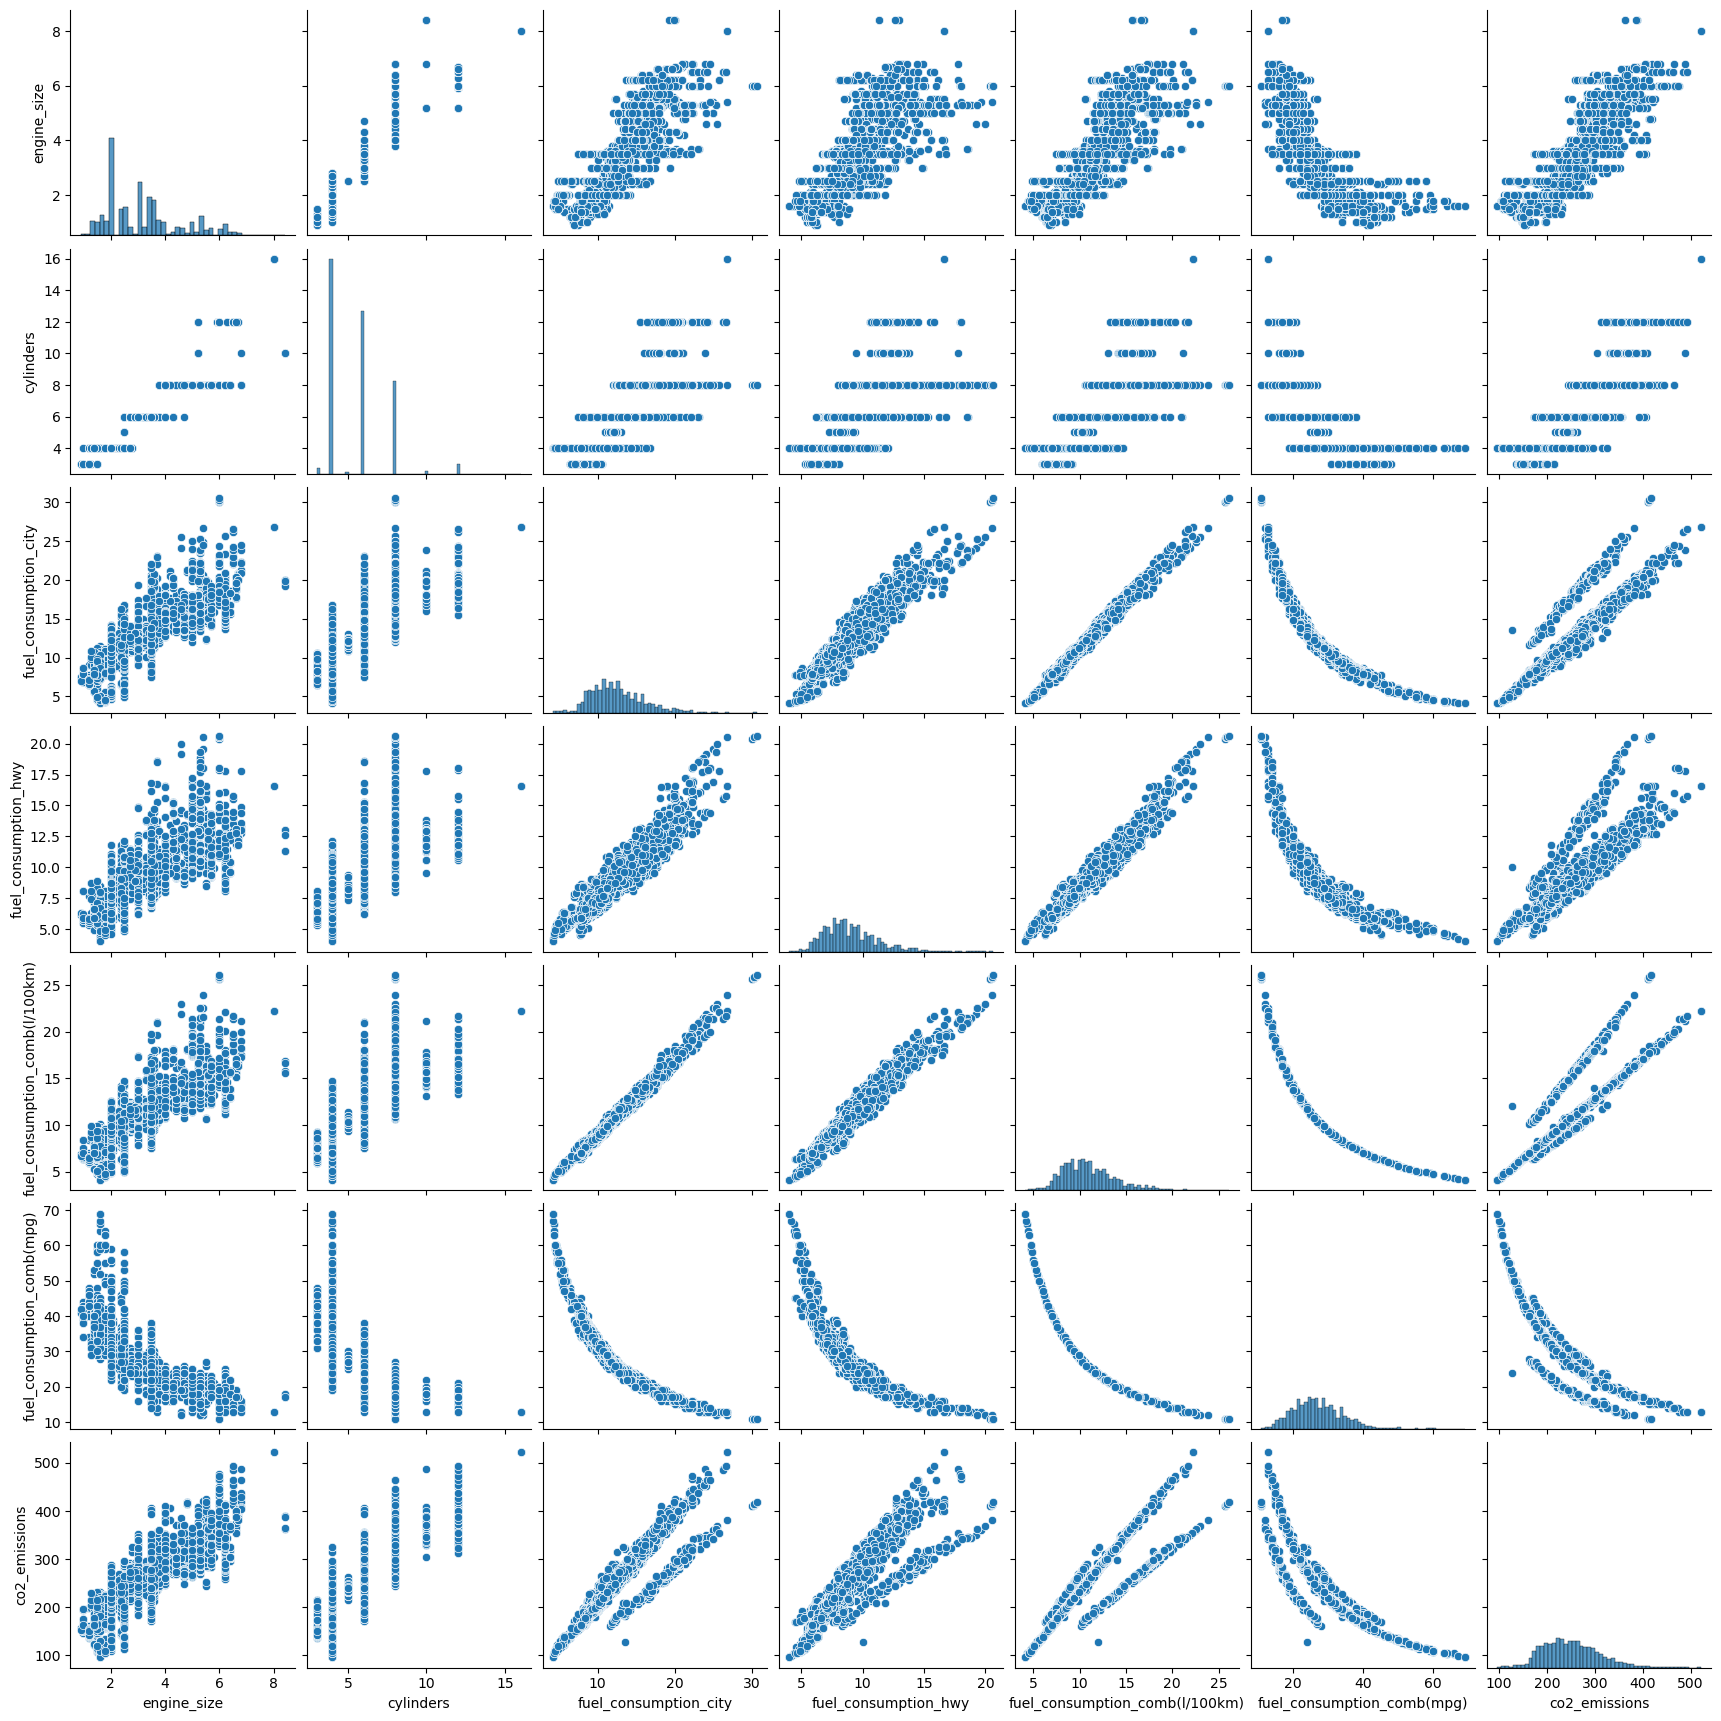

In [25]:
sns.pairplot(emissions)

<Axes: xlabel='co2_emissions', ylabel='Count'>

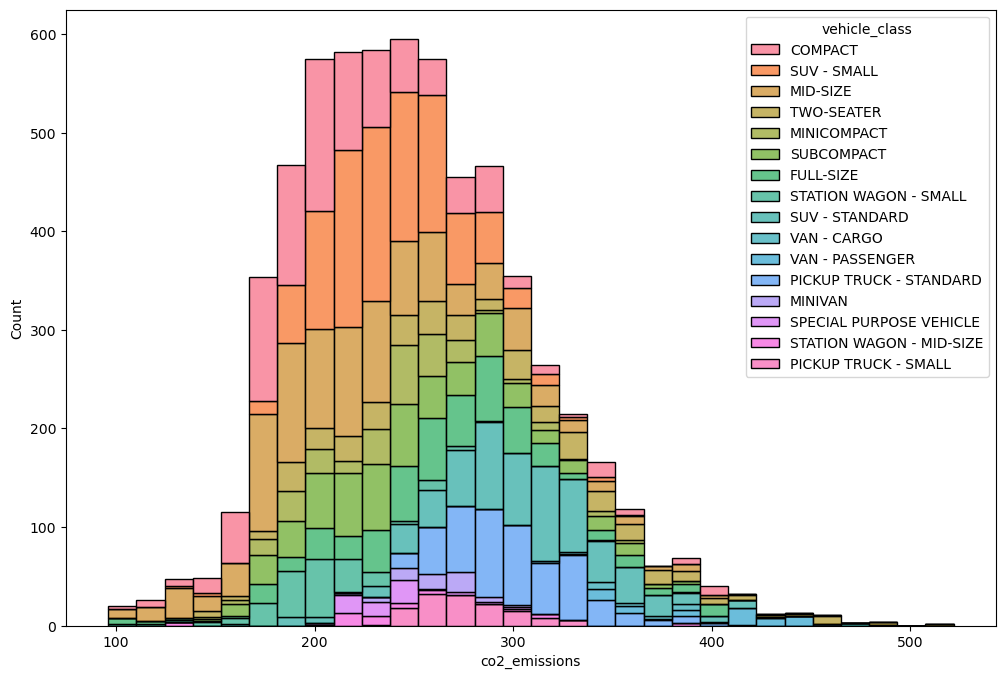

In [27]:
plt.figure(figsize=(12,8))
sns.histplot(data=emissions1, x='co2_emissions', bins=30, hue='vehicle_class', multiple='stack')

/Users/snehakoneru/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


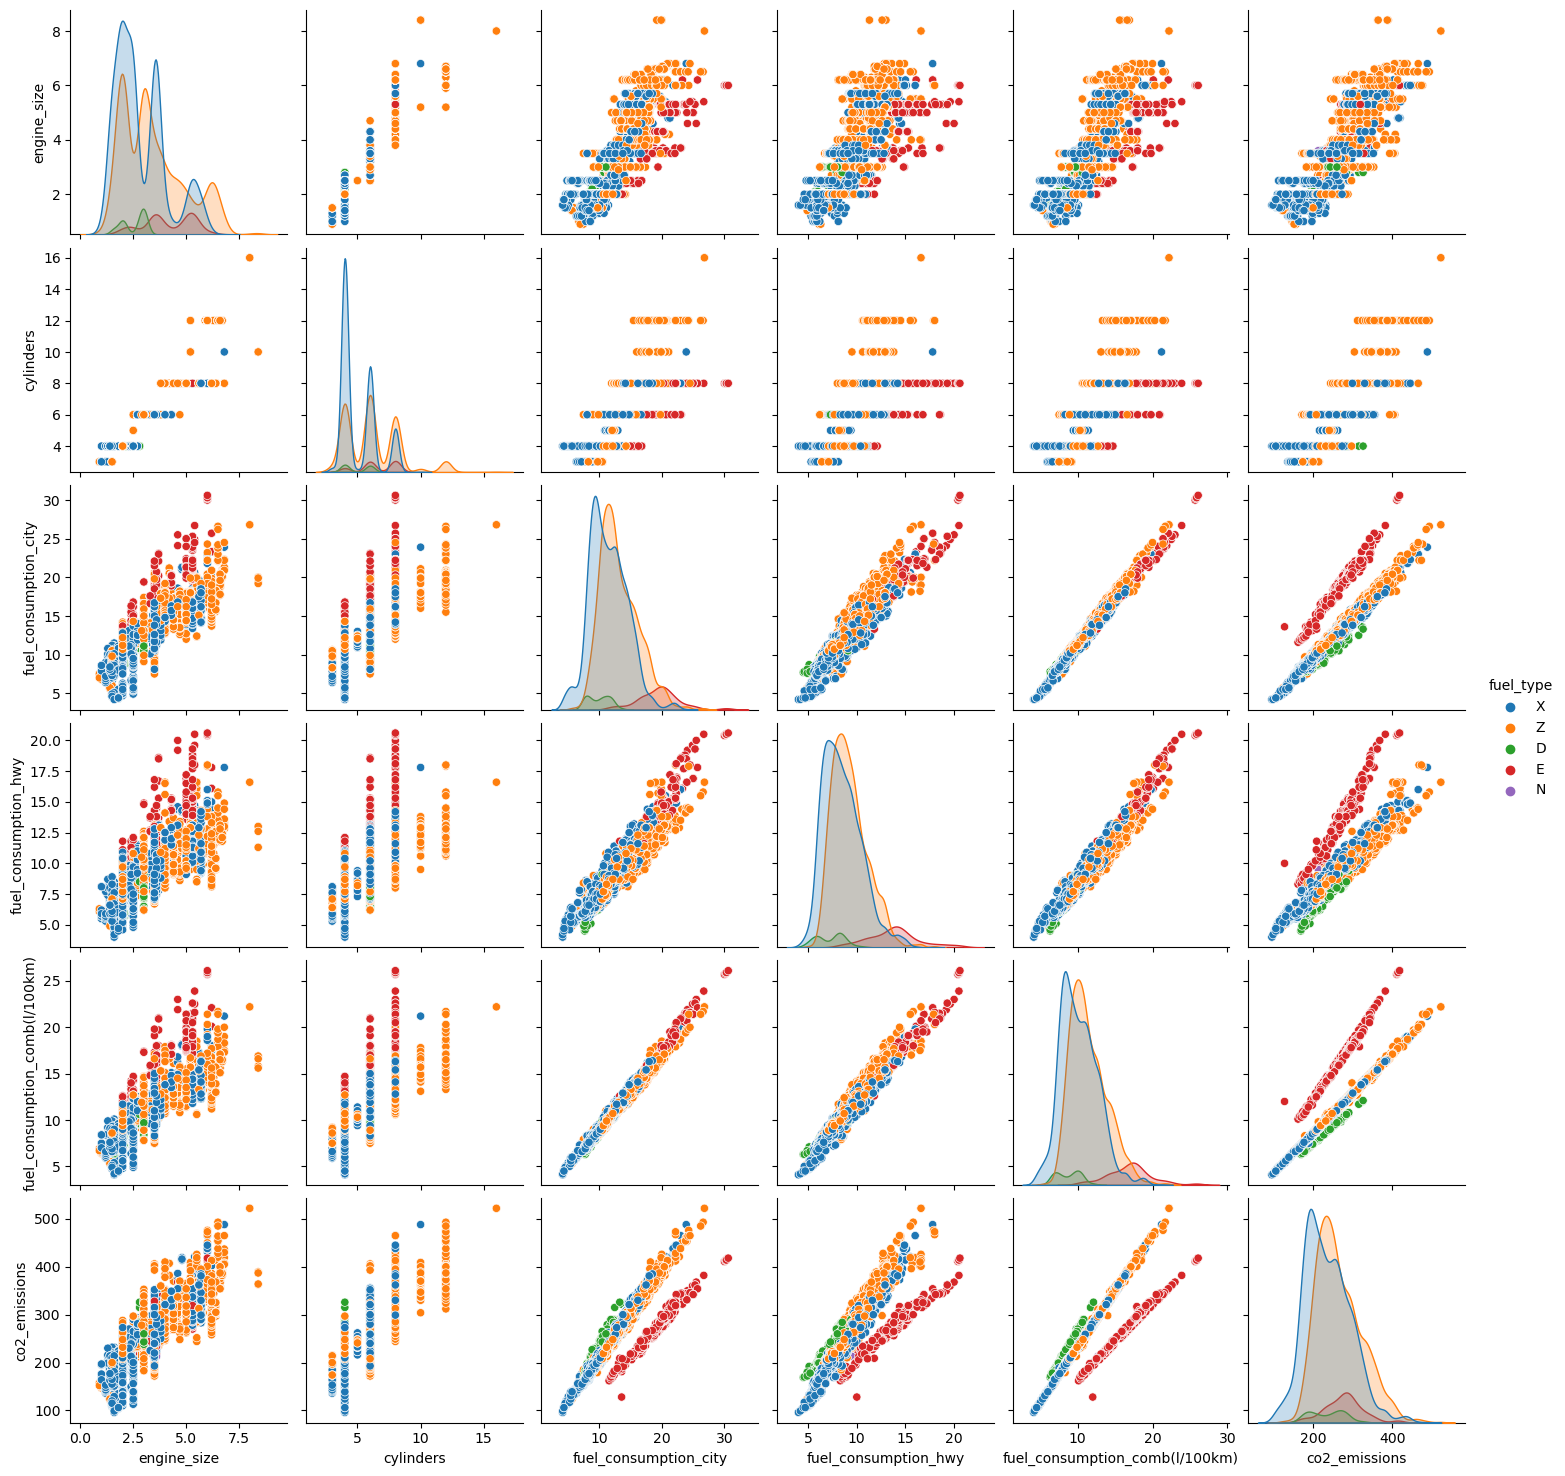

In [29]:
sns.pairplot(data=emissions1, hue='fuel_type', hue_order='X Z D E N'.split())

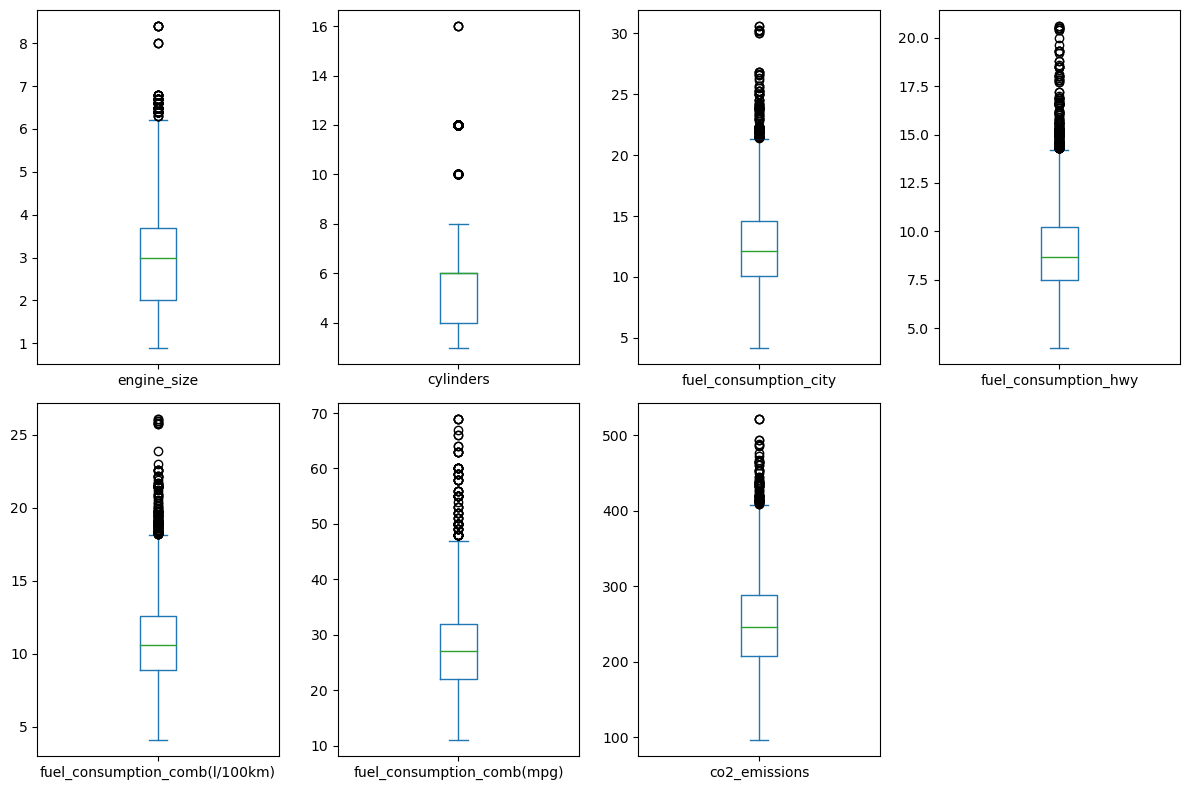

In [30]:
#Checking for outliers
emissions.plot(kind='box', subplots=True, figsize=(12,8), layout=(2,4))
plt.tight_layout()

Outliers are present. But as per the data the outliers seem to be normal for cars (for eg: cars can have more than 8 cylinders or cars can have more than 3 transmissions). Hence, not removing the outliers.

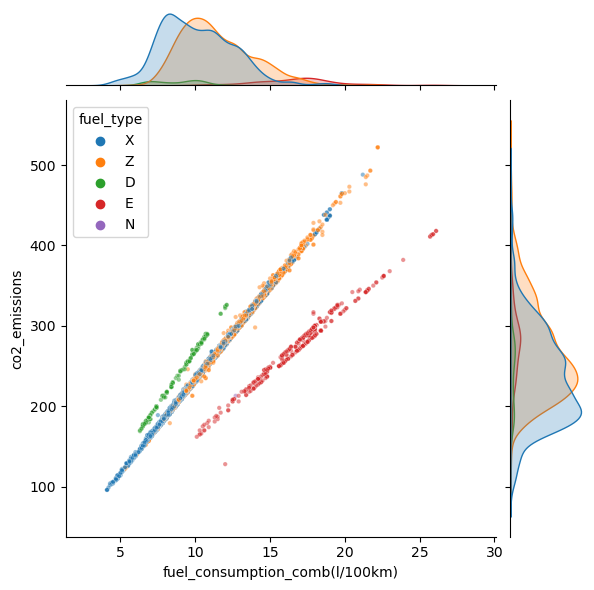

In [31]:
sns.jointplot(data=emissions, x='fuel_consumption_comb(l/100km)', y='co2_emissions', hue='fuel_type',
              hue_order='X Z D E N'.split(), alpha=0.5, s=10)

X(Regular Gasoline) appears to be emitting lower co2 emissions

/var/folders/gh/_7nf_xl92bd8fjzld_vp7b8m0000gn/T/ipykernel_51907/1212138565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(emissions['co2_emissions'])


<Axes: xlabel='co2_emissions', ylabel='Density'>

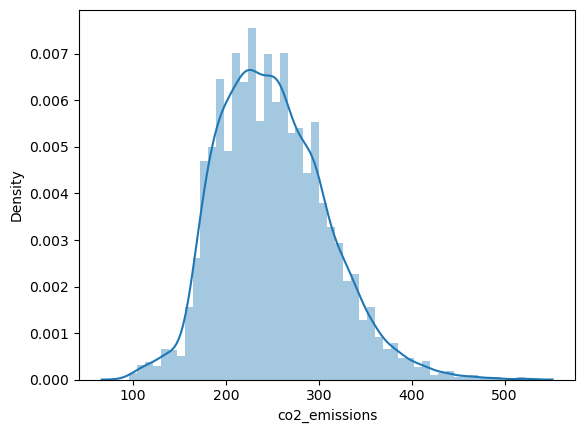

In [32]:
sns.distplot(emissions['co2_emissions'])

In [34]:
#Label encoding (Converting categorical variables to numbers)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
emissions['transmission'] = label_encoder.fit_transform(emissions['transmission'])
emissions['fuel_type'] = label_encoder.fit_transform(emissions['fuel_type'])
emissions['vehicle_class'] = label_encoder.fit_transform(emissions['vehicle_class'])
emissions['make'] = label_encoder.fit_transform(emissions['make'])
emissions['model'] = label_encoder.fit_transform(emissions['model'])
emissions

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,0,1057,0,2.0,4,2,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,4,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,3,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,2,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,2,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,41,1951,11,2.0,4,2,4,10.7,7.7,9.4,30,219
7381,41,1957,11,2.0,4,2,4,11.2,8.3,9.9,29,232
7382,41,1960,11,2.0,4,2,4,11.7,8.6,10.3,27,240
7383,41,1968,12,2.0,4,2,4,11.2,8.3,9.9,29,232


In [35]:
emissions2= emissions.drop_duplicates().reset_index(drop=True)
emissions2

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,0,1057,0,2.0,4,2,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,4,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,3,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,2,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,2,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
6268,41,1951,11,2.0,4,2,4,10.7,7.7,9.4,30,219
6269,41,1957,11,2.0,4,2,4,11.2,8.3,9.9,29,232
6270,41,1960,11,2.0,4,2,4,11.7,8.6,10.3,27,240
6271,41,1968,12,2.0,4,2,4,11.2,8.3,9.9,29,232


In [36]:
emissions2.drop(['fuel_consumption_comb(mpg)'],axis=1, inplace=True)

In [37]:
emissions2

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),co2_emissions
0,0,1057,0,2.0,4,2,4,9.9,6.7,8.5,196
1,0,1057,0,2.4,4,4,4,11.2,7.7,9.6,221
2,0,1058,0,1.5,4,3,4,6.0,5.8,5.9,136
3,0,1233,11,3.5,6,2,4,12.7,9.1,11.1,255
4,0,1499,11,3.5,6,2,4,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...,...,...,...,...
6268,41,1951,11,2.0,4,2,4,10.7,7.7,9.4,219
6269,41,1957,11,2.0,4,2,4,11.2,8.3,9.9,232
6270,41,1960,11,2.0,4,2,4,11.7,8.6,10.3,240
6271,41,1968,12,2.0,4,2,4,11.2,8.3,9.9,232


In [38]:
emissions2.corr()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),co2_emissions
make,1.000000,0.028961,-0.025572,-0.144503,-0.161666,0.180461,0.040332,-0.199629,-0.127698,-0.177060,-0.151964
model,0.028961,1.000000,0.207997,0.078981,0.056568,-0.017376,-0.084005,0.113945,0.169968,0.134848,0.115797
vehicle_class,-0.025572,0.207997,1.000000,0.158777,0.119431,-0.162759,-0.039916,0.257943,0.342829,0.290368,0.300973
engine_size,-0.144503,0.078981,0.158777,1.000000,0.928796,-0.330174,0.050193,0.834325,0.766700,0.820183,0.854999
cylinders,-0.161666,0.056568,0.119431,0.928796,1.000000,-0.287906,0.119138,0.801180,0.717321,0.780932,0.834697
transmission,0.180461,-0.017376,-0.162759,-0.330174,-0.287906,1.000000,0.176760,-0.350499,-0.351834,-0.355086,-0.327481
fuel_type,0.040332,-0.084005,-0.039916,0.050193,0.119138,0.176760,1.000000,-0.089750,-0.145791,-0.110518,0.093080
fuel_consumption_city,-0.199629,0.113945,0.257943,0.834325,0.801180,-0.350499,-0.089750,1.000000,0.950733,0.994040,0.918528
fuel_consumption_hwy,-0.127698,0.169968,0.342829,0.766700,0.717321,-0.351834,-0.145791,0.950733,1.000000,0.978578,0.883153
fuel_consumption_comb(l/100km),-0.177060,0.134848,0.290368,0.820183,0.780932,-0.355086,-0.110518,0.994040,0.978578,1.000000,0.916611


<Axes: >

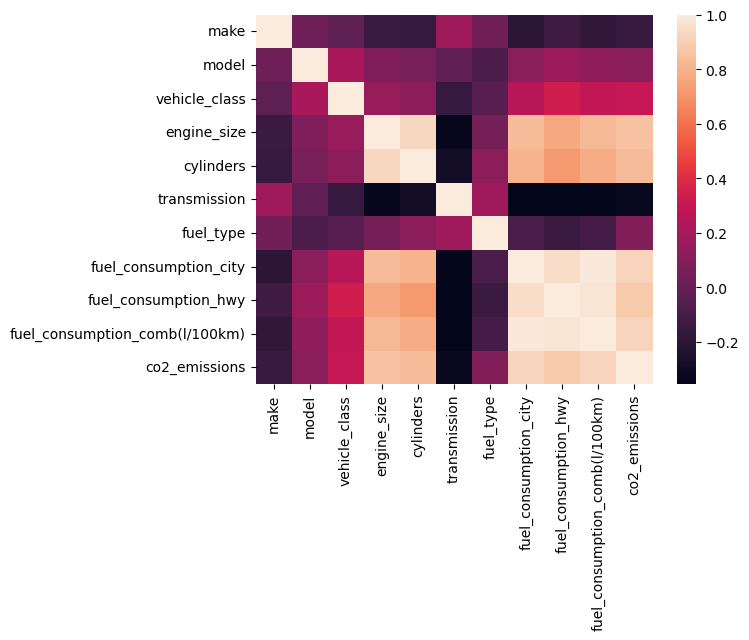

In [39]:
sns.heatmap(emissions2.corr())

# MODEL BUILDING

In [40]:
#Import ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [42]:
# Split emissions dataset into training and testing samples
X = emissions2.drop('co2_emissions', axis=1)
y = emissions2['co2_emissions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Decision Tree Regressor

In [43]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

In [44]:
dtr=DecisionTreeRegressor(max_depth=3,random_state=100)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=100)

In [45]:
predicted=dtr.predict(X_test)

In [46]:
r2_dtr = r2_score(y_test,predicted)
r2_dtr

0.8871167990706476

In [47]:
mse_dtr = mean_squared_error(y_test, predicted)
print(mse_dtr)
                    

395.06864158534984


In [48]:
rmse = np.sqrt(mse_dtr)
print(rmse)

19.87633370582588


In [49]:
X_columns=list(X.columns)

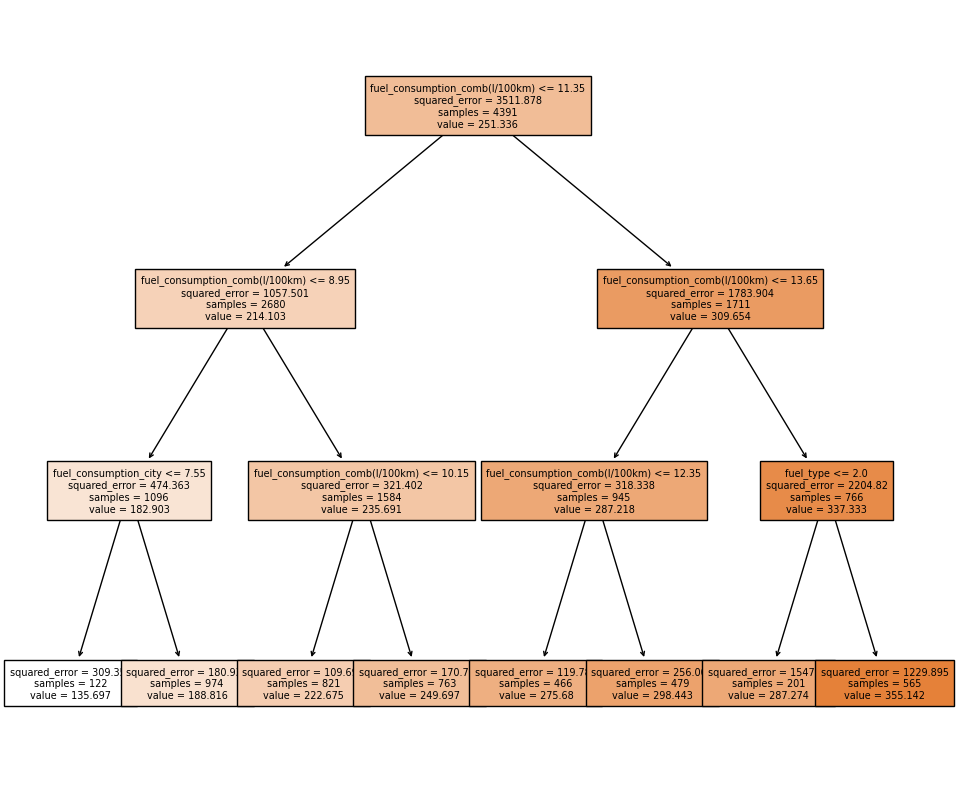

In [50]:
plt.figure(figsize=(12,10))
tree.plot_tree(dtr,feature_names=X_columns, filled=True,max_depth=3,fontsize=7)
plt.show()

# Random Forest Regressor

In [51]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)


RandomForestRegressor()

In [52]:
rf_predicted = rf.predict(X_test)

In [53]:
r2_rf = r2_score(y_test,rf_predicted)
r2_rf

0.9952739895075071

In [55]:
mse_rf = mean_squared_error(y_test, rf_predicted)
print(mse_rf)

16.54009214848356


In [56]:
rmse = np.sqrt(mse_rf)
print(rmse)

4.066951210487232


# K Neighbors Regressor

In [229]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [230]:
knn_predicted = knn.predict(X_test)

In [246]:
r2_knn = r2_score(y_test,knn_predicted)
r2_knn

0.8791257223463643

In [247]:
mse_knn = mean_squared_error(y_test, knn_predicted)
print(mse_knn)

423.0358129649309


In [248]:
rmse = np.sqrt(mse_knn)
print(rmse)

20.567834425746696


# Linear Regression

In [234]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [235]:
lr_predicted = lr.predict(X_test)

In [249]:
r2_lr = r2_score(y_test,lr_predicted)
r2_lr

0.8996815436895349

In [250]:
mse_lr = mean_squared_error(y_test, lr_predicted)
print(mse_lr)

351.09454670158317


In [251]:
rmse = np.sqrt(mse_lr)
print(rmse)

18.737517090094492


# Final Table

In [253]:
emissions_modeldata = {"Models":pd.Series(["Linear Regression","Decision Tree","Random Forest","KNN"]),
                  "Accuracy":pd.Series([r2_lr,r2_dtr,r2_rf,r2_knn]), "MSE":pd.Series([mse_lr,mse_dtr,mse_rf,mse_knn])}
table =pd.DataFrame(emissions_modeldata)
table.sort_values(['Accuracy'])

,Models,Accuracy,MSE
3,KNN,0.879126,423.035813
1,Decision Tree,0.887117,395.068642
0,Linear Regression,0.899682,351.094547
2,Random Forest,0.995454,15.909149


From the above table we can conclude that Random Forest Model has high Accuracy and is a much better model compared to other regression models. Also the MSE(Mean square error) value is very low compared to other models.
Smaller MSE value is desirable because it meas that the model is performing better in terms of regression accuracy.